In [215]:
import numpy as np
import pandas as pd

In [216]:
BetterLife = pd.read_csv("./Data/BetterLifeIndex.csv")
GDP = pd.read_csv("./Data/GDP_for_one_person.csv")

In [217]:
BetterLife

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,MN,Men,RATIO,Ratio,0,Units,NaN,NaN,18.2,NaN,NaN
2365,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,WMN,Women,RATIO,Ratio,0,Units,NaN,NaN,1.8,NaN,NaN
2366,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,22.0,NaN,NaN
2367,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,27.9,NaN,NaN


In [203]:
BetterLife = BetterLife[['Country','Value']]

In [204]:
BetterLife = BetterLife.rename(columns={'Country':'Entity'})

In [205]:
GDP

,Entity,Code,Year,GDP (constant 2015 US$)
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000
...,...,...,...,...
10664,Zimbabwe,ZWE,2017,20964866000
10665,Zimbabwe,ZWE,2018,22015179000
10666,Zimbabwe,ZWE,2019,20621079000
10667,Zimbabwe,ZWE,2020,19009139000


In [206]:
GDP = GDP.rename(columns={'GDP (constant 2015 US$)':'GDP'})

In [207]:
GDP['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979])

In [208]:
GDP = GDP[GDP['Year'].isin([2021])]

In [209]:
GDP

,Entity,Code,Year,GDP
19,Afghanistan,AFG,2021,17083574000
61,Albania,ALB,2021,13582024000
123,Algeria,DZA,2021,174201320000
143,American Samoa,ASM,2021,648340500
195,Andorra,AND,2021,2911602700
...,...,...,...,...
10415,Vanuatu,VUT,2021,821237700
10453,Vietnam,VNM,2021,332270930000
10515,World,OWID_WRL,2021,86852660000000
10606,Zambia,ZMB,2021,24495921000


In [210]:
GDP = GDP[['Entity','GDP']]

In [212]:
GDP

,Entity,GDP
19,Afghanistan,17083574000
61,Albania,13582024000
123,Algeria,174201320000
143,American Samoa,648340500
195,Andorra,2911602700
...,...,...
10415,Vanuatu,821237700
10453,Vietnam,332270930000
10515,World,86852660000000
10606,Zambia,24495921000


In [213]:
BetterLife

,Entity,Value
0,Australia,3.1
1,Austria,2.3
2,Belgium,2.4
3,Canada,3.8
4,Czechia,2.3
...,...,...
2364,Costa Rica,18.2
2365,Costa Rica,1.8
2366,Costa Rica,22.0
2367,Costa Rica,27.9


In [196]:
data = pd.merge(BetterLife, GDP, on='Entity')

In [197]:
data = data[['Entity', 'GDP', 'Value']]

In [198]:
data

,Entity,GDP,Value
0,Australia,1524362400000,3.1
1,Australia,1524362400000,2.7
2,Australia,1524362400000,19.4
3,Australia,1524362400000,67.0
4,Australia,1524362400000,81.0
...,...,...,...
2133,Costa Rica,66456646000,18.2
2134,Costa Rica,66456646000,1.8
2135,Costa Rica,66456646000,22.0
2136,Costa Rica,66456646000,27.9


In [199]:
data['GDP'] = data['GDP'] // 10000000

In [200]:
data

,Entity,GDP,Value
0,Australia,152436,3.1
1,Australia,152436,2.7
2,Australia,152436,19.4
3,Australia,152436,67.0
4,Australia,152436,81.0
...,...,...,...
2133,Costa Rica,6645,18.2
2134,Costa Rica,6645,1.8
2135,Costa Rica,6645,22.0
2136,Costa Rica,6645,27.9


In [173]:
data['Entity'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden',
       'United Kingdom', 'United States', 'Chile', 'Estonia', 'Israel',
       'Latvia', 'Slovenia', 'Switzerland', 'Brazil', 'Russia',
       'South Africa', 'Colombia', 'Lithuania', 'Costa Rica'],
      dtype=object)

In [182]:
grape = data[data['Entity'].isin(['Hungary','France','United States', 'New Zealand','Australia','Denmark'])]

In [176]:
import seaborn as sns

In [183]:
grape

,Entity,GDP,Value
0,Australia,152436,3.10
1,Australia,152436,2.70
2,Australia,152436,19.40
3,Australia,152436,67.00
4,Australia,152436,81.00
...,...,...,...
1510,United States,2052946,13.90
1511,United States,2052946,6.60
1512,United States,2052946,14.57
1513,United States,2052946,14.80


<Axes: xlabel='Value', ylabel='GDP'>

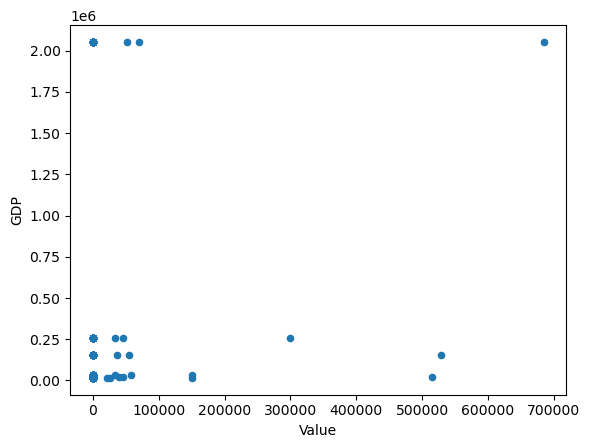

In [179]:
grape.plot(kind='scatter', x='Value',y='GDP')

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(by

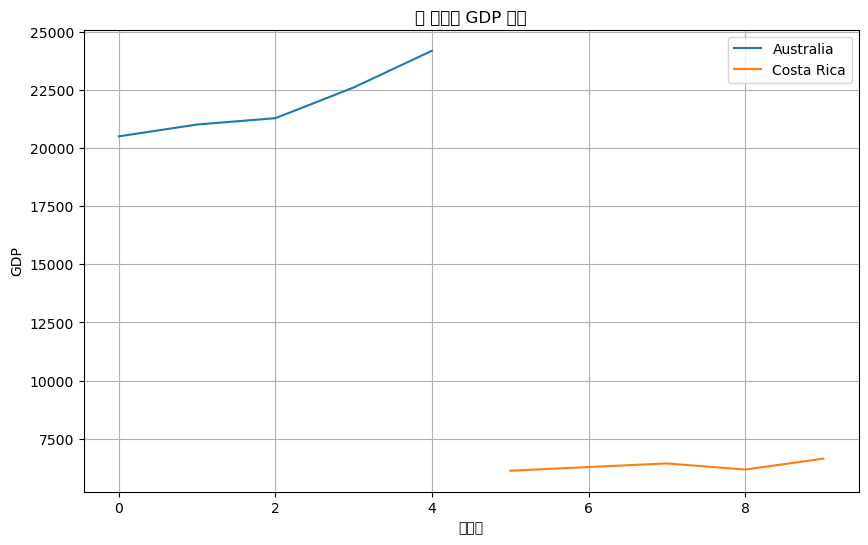

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
data = {
    'Entity': ['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica'],
    'GDP': [20500, 21009, 21281, 22603, 24181, 6126, 6286, 6438, 6177, 6645],
    'Value': [3.1, 3.1, 3.1, 3.1, 3.1, 12.7, 12.7, 12.7, 12.7, 12.7]
}

df = pd.DataFrame(data)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 나라의 GDP에 대한 선 그래프
for country, country_data in df.groupby('Entity'):
    plt.plot(country_data.index, country_data['GDP'], label=country)

plt.title('각 나라의 GDP 변화')
plt.xlabel('인덱스')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()
